<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/pracise_CNN2cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.datasets import *
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [32]:
dir(datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [33]:
dir(datasets.cifar10)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [34]:
cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [35]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

In [36]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
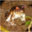

In [37]:
train_images[0]

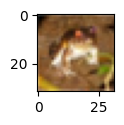

In [38]:
plt.figure(figsize=(1,1))
plt.imshow(train_images[0])
plt.show()

In [39]:
train_images[0].ndim

3

In [40]:
train_images[0].shape

(32, 32, 3)

In [41]:
type(train_images[0])

numpy.ndarray

In [42]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [43]:
pd.Series(load_data())

,0
0,([[[[ 59 62 63]\n [ 43 46 45]\n [ 50 48 ...
1,([[[[158 112 49]\n [159 111 47]\n [165 116 ...


In [44]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [45]:
train_images[12].shape

(32, 32, 3)

In [46]:
train_images[12].max()

np.uint8(251)

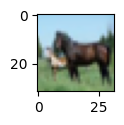

In [47]:
plt.figure(figsize=(1,1))
plt.imshow(train_images[12])
plt.show()

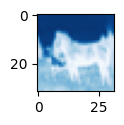

In [48]:
#select image with one color
plt.figure(figsize=(1,1))
plt.imshow(train_images[12][ : , : ,2],cmap='Blues')
plt.show()

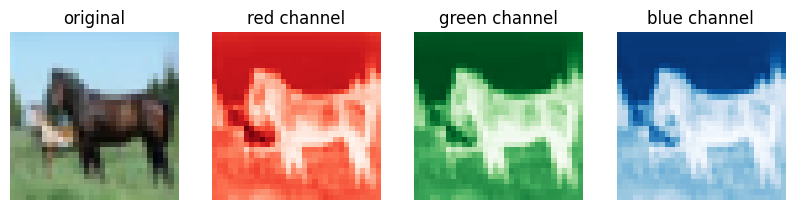

In [49]:
#subplot
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.imshow(train_images[12])
plt.title('original')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(train_images[12][ : , : ,0],cmap='Reds')
plt.title('red channel')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(train_images[12][ : , : ,1],cmap='Greens')
plt.title('green channel')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(train_images[12][ : , : ,2],cmap='Blues')
plt.title('blue channel')
plt.axis('off')
plt.show()

In [50]:
#matrix of diff color
print("red channel matrix :",train_images[12][ : , : ,0])
print("green channel matrix :",train_images[12][ : , : ,1])
print("blue channel matrix :",train_images[12][ : , : ,2])

red channel matrix : [[164 162 162 ... 157 153 153]
 [168 166 166 ... 164 160 158]
 [172 170 171 ... 168 165 163]
 ...
 [123 117 112 ... 117  95 120]
 [120 116 112 ... 126 120 120]
 [121 120 116 ... 124 124 120]]
green channel matrix : [[215 212 212 ... 210 208 203]
 [218 215 215 ... 212 209 205]
 [220 217 218 ... 212 208 207]
 ...
 [160 154 149 ... 136 115 149]
 [156 151 147 ... 149 144 152]
 [154 152 148 ... 152 154 154]]
blue channel matrix : [[244 240 240 ... 237 235 234]
 [245 242 242 ... 238 236 235]
 [246 243 244 ... 238 235 236]
 ...
 [105 102  99 ... 100  79 100]
 [100  99  96 ... 110 103 101]
 [ 96  99  97 ... 108 107 100]]


In [51]:
train_images[12][ : , : ,0].shape

(32, 32)

In [52]:
train_images[12][ : , : ,0].min(),train_images[12][ : , : ,0].max()

(np.uint8(2), np.uint8(234))

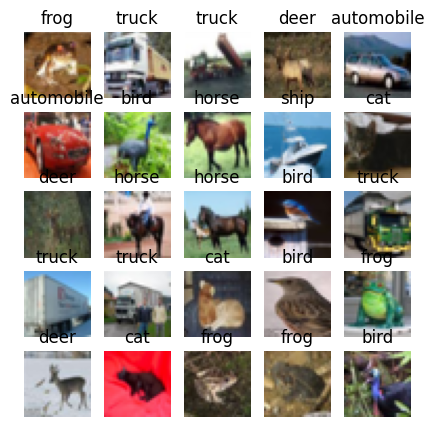

In [53]:
#lets plot 25 image
a=25
plt.figure(figsize=(5,5))
for i in range(a):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.title(class_names[train_labels[i][0]])
  plt.axis('off')
plt.show()

In [54]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
#create model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

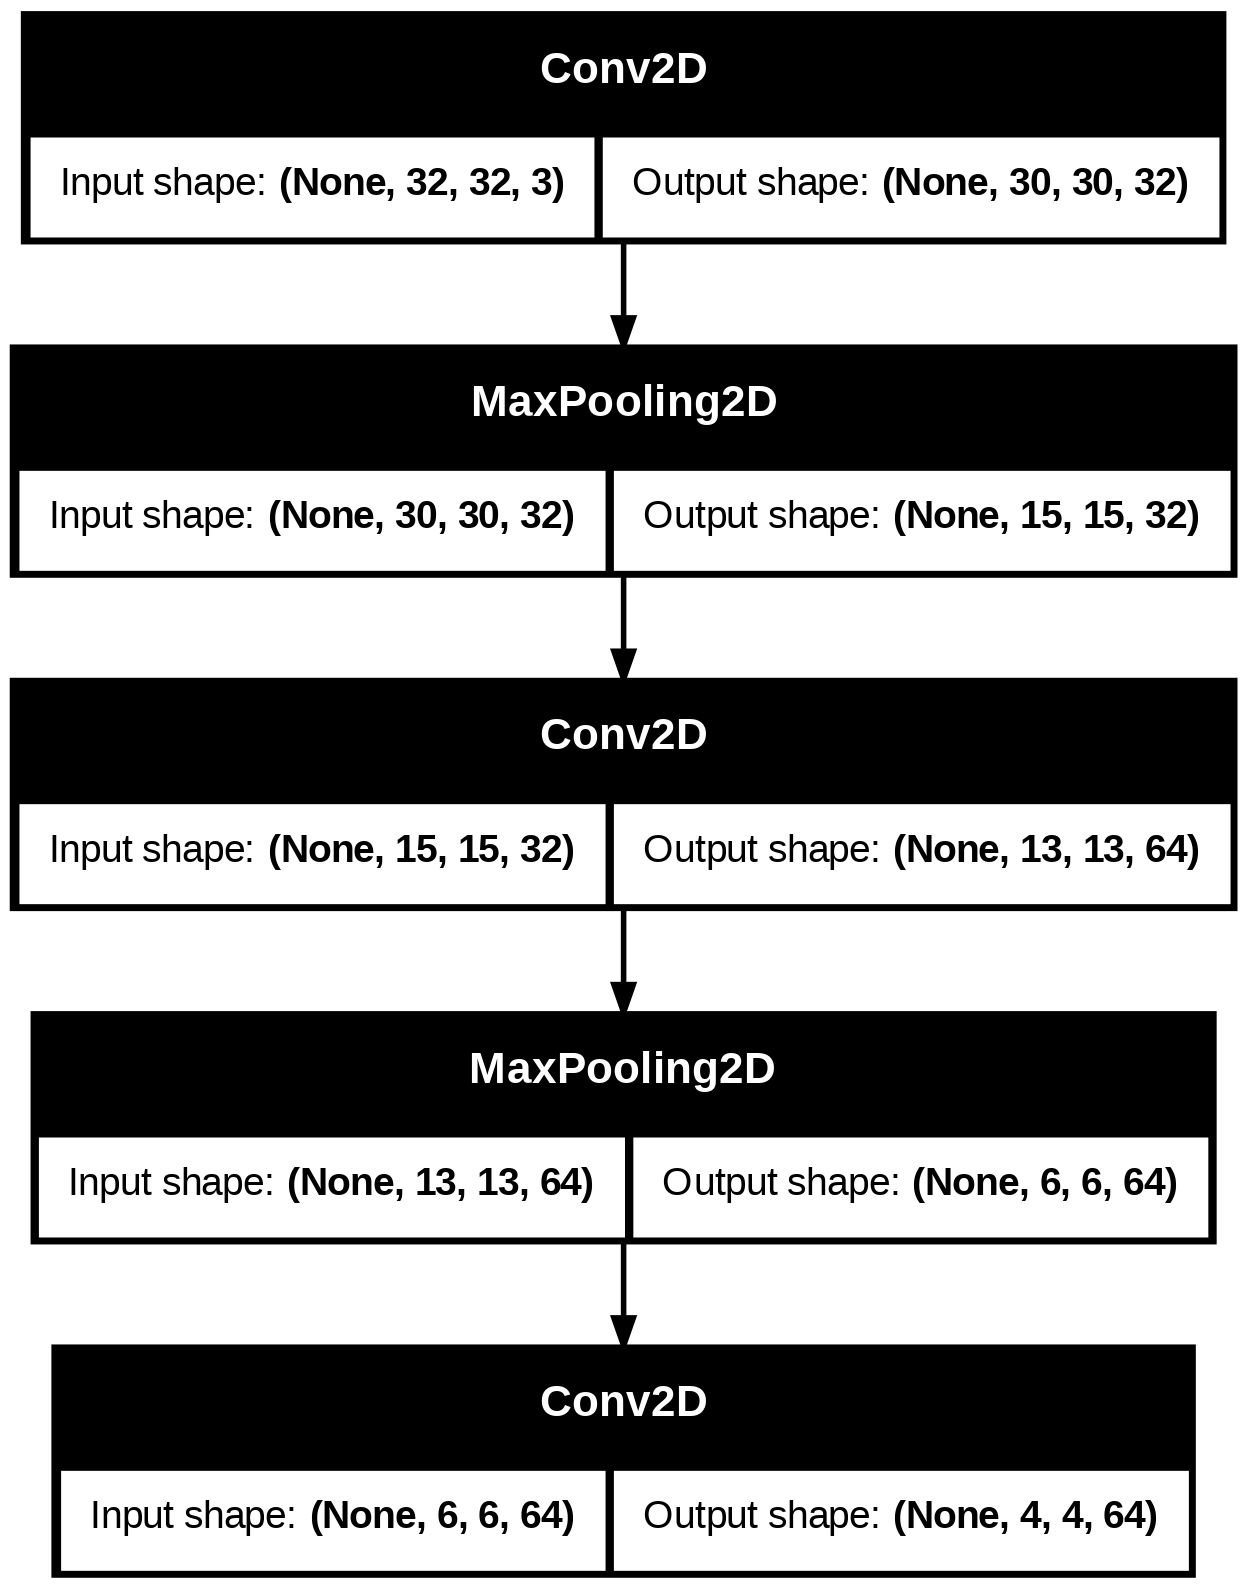

In [58]:
#plot
tf.keras.utils.plot_model(model,show_shapes=True)

In [59]:
#create ann
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
#compile
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [63]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.2563 - loss: 2.6811 - val_accuracy: 0.4683 - val_loss: 1.4777
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4875 - loss: 1.4222 - val_accuracy: 0.5161 - val_loss: 1.3338
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5604 - loss: 1.2474 - val_accuracy: 0.5851 - val_loss: 1.1756
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6090 - loss: 1.1080 - val_accuracy: 0.5842 - val_loss: 1.2027
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6385 - loss: 1.0293 - val_accuracy: 0.6281 - val_loss: 1.0875
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6725 - loss: 0.9409 - val_accuracy: 0.6293 - val_loss: 1.0861
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.6851 - loss: 0.9029 - val_accuracy: 0.6333 - val_loss: 1.0809
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7084 -